<a href="https://colab.research.google.com/github/rania-alhabsyi/MachineLearningTasks/blob/main/EndTermTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>UAS Computer Intelligence - S1 Mathematics</b></h1>

<h2>Sentiment Analysis on IMDb Movie Reviews Using Bidirectional Long Short-Term Memory (Bi-LSTM)</h2>

Nama: Aisyah Rania Al Habsyi

NPM: 2206052805


# Install & Import Libraries

In [ ]:
!pip install kaggle

In [ ]:
import os
import json

from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Data Collection

## Import Dataset

In [ ]:
kaggle_dictionary = json.load(open("/content/kaggle (2).json"))

In [ ]:
os.environ["KAGGLE_USERNAME"] = kaggle_dictionary["username"]
os.environ["KAGGLE_KEY"] = kaggle_dictionary["key"]

In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 19% 5.00M/25.7M [00:00<00:00, 32.8MB/s]
100% 25.7M/25.7M [00:00<00:00, 117MB/s] 


In [ ]:
!ls

 imdb-dataset-of-50k-movie-reviews.zip	'kaggle (2).json'   sample_data


In [ ]:
with ZipFile("/content/imdb-dataset-of-50k-movie-reviews.zip", "r") as zip_ref:
    zip_ref.extractall("/content")

In [ ]:
!ls

'IMDB Dataset.csv'   imdb-dataset-of-50k-movie-reviews.zip  'kaggle (2).json'   sample_data


## Load Dataset

In [ ]:
data = pd.read_csv("/content/IMDB Dataset.csv")

In [ ]:
data.shape

(50000, 2)

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.sentiment.value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
# Encode the sentiment categories from string to integer
data.replace({"sentiment": {"positive": 1, "negative":0 }}, inplace=True)

<ipython-input-14-a5db085a5d7c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"sentiment": {"positive": 1, "negative":0 }}, inplace=True)


In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
data.sentiment.value_counts()

,count
sentiment,
1,25000
0,25000


In [ ]:
import re



def remove_tags(string):

    removelist = ""  # Add any characters you'd like to keep

    # Remove HTML tags

    result = re.sub(r'<[^>]+>', '', string)

    # Remove URLs

    result = re.sub(r'https?://\S+', '', result)

    # Remove non-alphanumeric characters (except for those in the removelist)

    result = re.sub(r'[^a-zA-Z0-9' + removelist + r'\s]', ' ', result)

    # Convert to lowercase

    result = result.lower()

    return result

In [ ]:
data['review'] = data['review'].apply(remove_tags)

## Train-test split

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
print(train_data.shape)
print(test_data.shape)

(40000, 2)
(10000, 2)


# Data Preprocessing

Before training, we need to tokenize our text data (the reviews) from string to smaller units, which are tokens. This method is used to make computational analysis on text data easier

In [ ]:
# Tokenize text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

In [ ]:
# Show tokenized data
print(f"X_train: \n{X_train}")
print(f"\nX_test: \n{X_test}")

X_train: 
[[2882 3729 1686 ...  201  352 3873]
 [ 594   31    3 ...   22  103    7]
 [   0    0    0 ...    2  706   62]
 ...
 [   0    0    0 ... 1639    2  593]
 [   0    0    0 ...  246  103  126]
 [   0    0    0 ...   71   73 1985]]

X_test: 
[[   0    0    0 ...  986  716  159]
 [ 866   11  165 ...   47    9  379]
 [   0    0    0 ...   51 1074   97]
 ...
 [ 428  689   12 ...  126  200 2977]
 [   0    0    0 ... 1056    1 2293]
 [   0    0    0 ...    1  334   28]]


In [ ]:
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

# LSTM Model (Original)

## Construct Model

In [ ]:
# build the model

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

## Train Model

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 136s 254ms/step - accuracy: 0.7215 - loss: 0.5324 - val_accuracy: 0.8166 - val_loss: 0.4037
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 129s 259ms/step - accuracy: 0.8518 - loss: 0.3577 - val_accuracy: 0.8462 - val_loss: 0.3644
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 149s 272ms/step - accuracy: 0.8523 - loss: 0.3558 - val_accuracy: 0.8459 - val_loss: 0.3516
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 135s 258ms/step - accuracy: 0.8772 - loss: 0.3023 - val_accuracy: 0.8574 - val_loss: 0.3378
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 142s 258ms/step - accuracy: 0.8959 - loss: 0.2678 - val_accuracy: 0.8720 - val_loss: 0.3171
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 138s 251ms/step - accuracy: 0.9151 - loss: 0.2175 - val_accuracy: 0.8658 - val_loss: 0.3404
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 144s 254ms/step - accuracy: 0.9205 - loss: 0.2045 - val_accuracy: 0.8668 - val_loss: 0.3345
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 128s 256ms/step - accuracy: 0.9316 -

# Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 84ms/step - accuracy: 0.8688 - loss: 0.3612
Test Loss: 0.36714521050453186
Test Accuracy: 0.8677999973297119


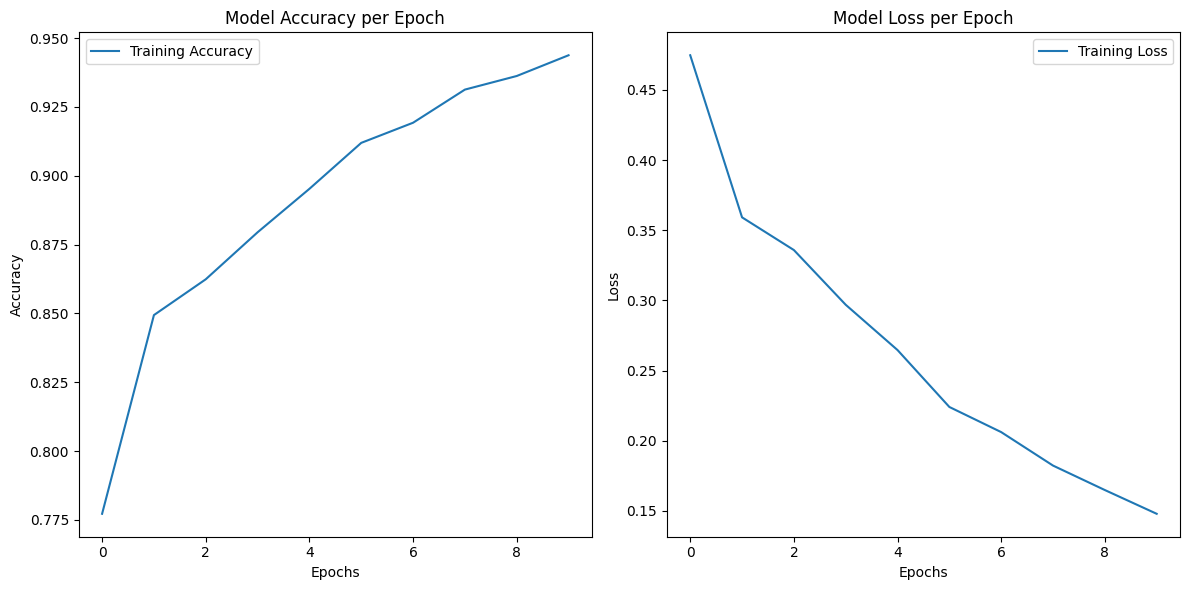

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/step


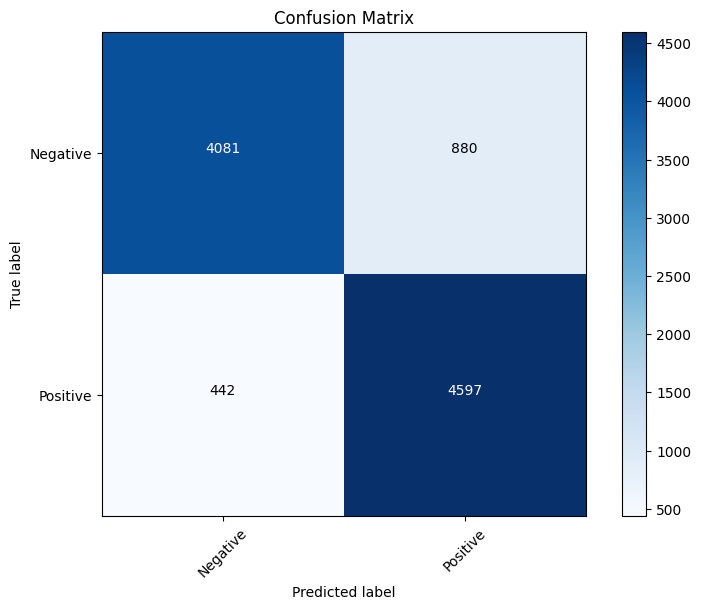

In [ ]:
# prompt: create confusion matrix

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have your model predictions and true labels
# Replace these with your actual predictions and true labels.
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5) # Convert probabilities to binary predictions
Y_true = np.array(Y_test)

# Create confusion matrix
cm = confusion_matrix(Y_true, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Negative', 'Positive']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("Test set classification report:\n")
print(classification_report(Y_true, Y_pred))

Test set classification report:

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      4961
           1       0.84      0.91      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



# LSTM (add layers and increase seq length)

In [ ]:
# Increase sequence length to capture more context
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=300)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=300)

In [ ]:
from tensorflow.keras.layers import Bidirectional
import numpy as np

model2 = Sequential()
model2.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model2.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
model2.add(Dense(64, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))

model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history2 = model2.fit(X_train, Y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


500/500 ━━━━━━━━━━━━━━━━━━━━ 335s 664ms/step - accuracy: 0.7152 - loss: 0.5318 - val_accuracy: 0.8304 - val_loss: 0.3912
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 394s 690ms/step - accuracy: 0.8503 - loss: 0.3598 - val_accuracy: 0.8366 - val_loss: 0.3655
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 362s 649ms/step - accuracy: 0.8717 - loss: 0.3189 - val_accuracy: 0.8664 - val_loss: 0.3484
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 391s 668ms/step - accuracy: 0.8817 - loss: 0.2939 - val_accuracy: 0.8074 - val_loss: 0.4209
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 377s 659ms/step - accuracy: 0.8761 - loss: 0.3085 - val_accuracy: 0.8673 - val_loss: 0.3264


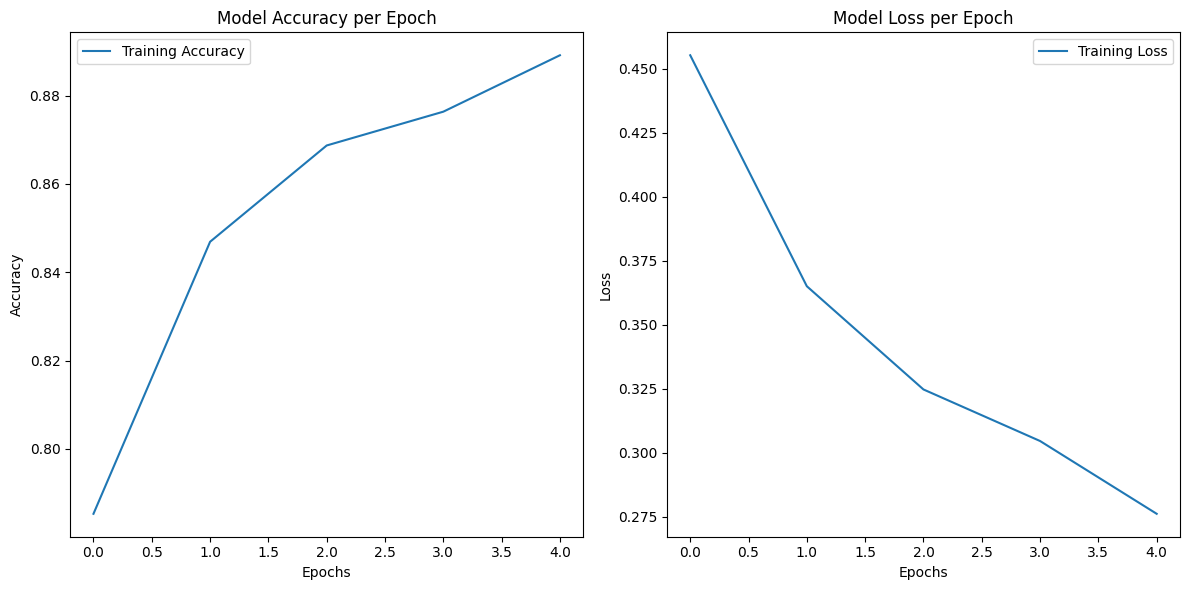

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 72s 230ms/step


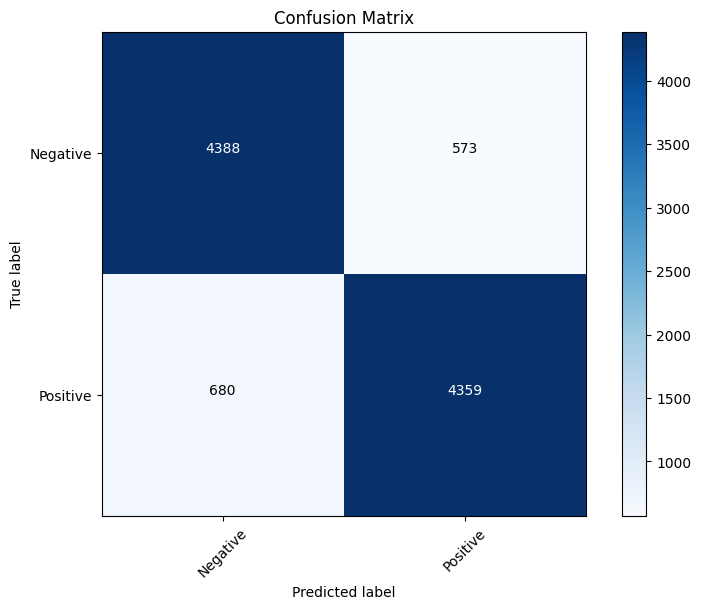

In [ ]:
# prompt: create confusion matrix

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have your model predictions and true labels
# Replace these with your actual predictions and true labels.
Y_pred2 = model2.predict(X_test)
Y_pred2 = (Y_pred2 > 0.5) # Convert probabilities to binary predictions
Y_true2 = np.array(Y_test)

# Create confusion matrix
cm2 = confusion_matrix(Y_true2, Y_pred2)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm2, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Negative', 'Positive']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm2.max() / 2.
for i, j in np.ndindex(cm2.shape):
    plt.text(j, i, format(cm2[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm2[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("Test set classification report:\n")
print(classification_report(Y_true2, Y_pred2))

Test set classification report:

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4961
           1       0.88      0.87      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



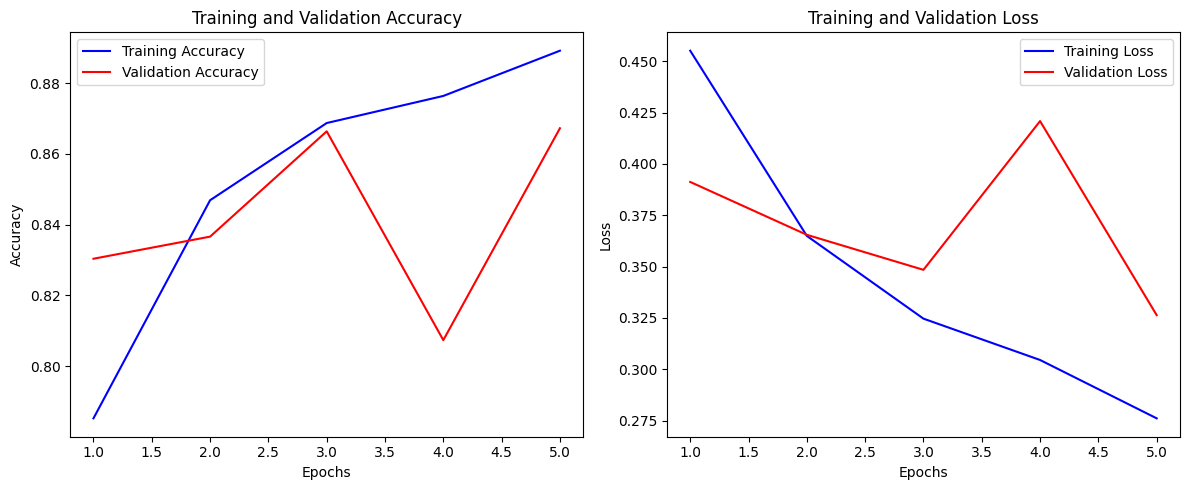

313/313 ━━━━━━━━━━━━━━━━━━━━ 67s 212ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.88      0.88      4961
    Positive       0.88      0.87      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Plotting the loss and accuracy
def plot_loss_accuracy(history):
    # Extract loss and accuracy data
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create figure for loss and accuracy
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_loss_accuracy(history2)

# Generating predictions and the classification report
# Assuming you have X_test and Y_test as the test data and labels
Y_pred = model2.predict(X_test)
Y_pred_classes = (Y_pred > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Generate and print classification report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_classes, target_names=["Negative", "Positive"]))

In [ ]:
from sklearn.metrics import classification_report

# Generate predictions for the training set
Y_train_pred = model2.predict(X_train)
Y_train_pred_classes = (Y_train_pred > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Generate and print the classification report
print("Classification Report (Train Set):")
print(classification_report(Y_train, Y_train_pred_classes, target_names=["Negative", "Positive"]))


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 276s 220ms/step
Classification Report (Train Set):
              precision    recall  f1-score   support

    Negative       0.91      0.92      0.91     20039
    Positive       0.92      0.91      0.91     19961

    accuracy                           0.91     40000
   macro avg       0.91      0.91      0.91     40000
weighted avg       0.91      0.91      0.91     40000



313/313 ━━━━━━━━━━━━━━━━━━━━ 65s 208ms/step


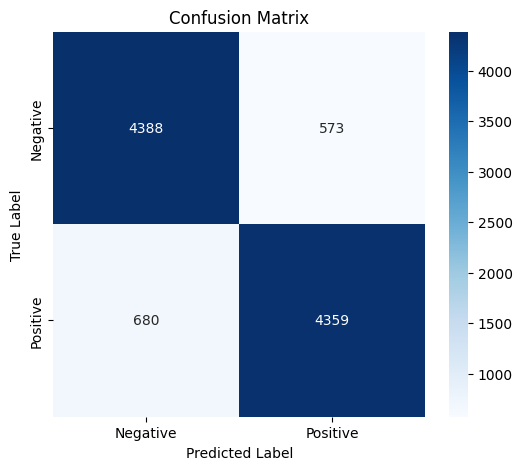

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate predictions for the test set
Y_test_pred = model2.predict(X_test)
Y_test_pred_classes = (Y_test_pred > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Create confusion matrix
cm = confusion_matrix(Y_test, Y_test_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()